#                                             # PREDICTING THE  PRICES



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Required dataset

In [35]:
data= pd.read_csv(r"C:\Users\M.komala\Downloads\Expenses - Sheet1.csv")

# Perform EDA

In [191]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


In [170]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [171]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [173]:
data.shape

(1338, 7)

In [21]:
data.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [175]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422346
std,14.049960,6.098187,1.205493,12110.011277
min,18.000000,15.960000,0.000000,1121.874000
25%,27.000000,26.296250,0.000000,4740.287000
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


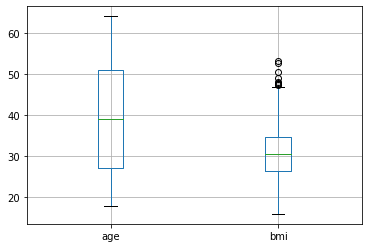

In [25]:
boxplot = data.boxplot(column=['age', 'bmi']) 

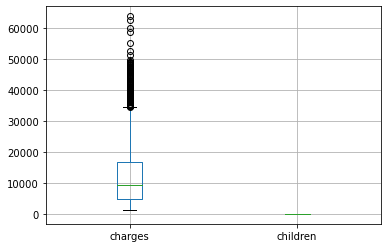

In [26]:
boxplot = data.boxplot(column=['charges', 'children']) 

<AxesSubplot:xlabel='children'>

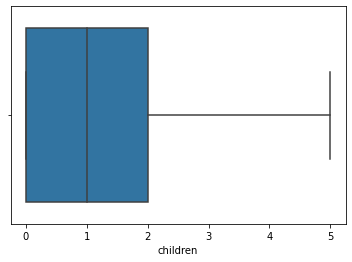

In [27]:
sns.boxplot(data['children'])

<AxesSubplot:xlabel='charges'>

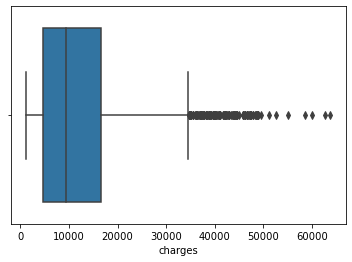

In [8]:
sns.boxplot(data['charges'])

In [28]:
data.nlargest(10, ['charges'])

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.43
1300,45,male,30.360,0,yes,southeast,62592.87
1230,52,male,34.485,3,yes,northwest,60021.40
577,31,female,38.095,1,yes,northeast,58571.07
819,33,female,35.530,0,yes,northwest,55135.40
1146,60,male,32.800,0,yes,southwest,52590.83
34,28,male,36.400,1,yes,southwest,51194.56
1241,64,male,36.960,2,yes,southeast,49577.66
1062,59,male,41.140,1,yes,southeast,48970.25
488,44,female,38.060,0,yes,southeast,48885.14


In [ ]:
# Identified Outliers in the Data

# So we are removing outliers 

In [40]:
# for charges remove outliers

filter_ch= data['charges'].values<50000
data=data[filter_ch]
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


<AxesSubplot:xlabel='charges'>

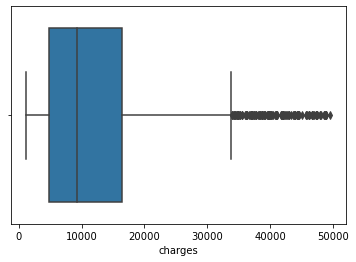

In [41]:
# The Outliers above 50000 identified
# Total seven rows are removed
sns.boxplot(data.charges)

In [32]:
data.nlargest(10, ['bmi'])

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,18.0
1047,22,male,52.58,1,yes,southeast,22.0
847,23,male,50.38,1,no,southeast,23.0
116,58,male,49.06,0,no,southeast,58.0
286,46,female,48.07,2,no,northeast,46.0
1088,52,male,47.74,1,no,southeast,52.0
860,37,female,47.60,2,yes,southwest,37.0
401,47,male,47.52,1,no,southeast,47.0
543,54,female,47.41,0,yes,southeast,NaN
438,52,female,46.75,5,no,southeast,52.0


In [22]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,19.0
1,18,male,33.770,1,no,southeast,18.0
2,28,male,33.000,3,no,southeast,28.0
3,33,male,22.705,0,no,northwest,33.0
4,32,male,28.880,0,no,northwest,32.0
5,31,female,25.740,0,no,southeast,31.0
6,46,female,33.440,1,no,southeast,46.0
7,37,female,27.740,3,no,northwest,37.0
8,37,male,29.830,2,no,northeast,37.0
9,60,female,25.840,0,no,northwest,60.0


In [15]:
# for bmi remove outliers

data['bmi']= data[data['bmi']<50]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,19.0
1,18,male,33.770,1,no,southeast,18.0
2,28,male,33.000,3,no,southeast,28.0
3,33,male,22.705,0,no,northwest,33.0
4,32,male,28.880,0,no,northwest,32.0


,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,18.0
1047,22,male,52.58,1,yes,southeast,22.0
847,23,male,50.38,1,no,southeast,23.0
116,58,male,49.06,0,no,southeast,58.0
286,46,female,48.07,2,no,northeast,46.0
1088,52,male,47.74,1,no,southeast,52.0
860,37,female,47.60,2,yes,southwest,37.0
401,47,male,47.52,1,no,southeast,47.0
543,54,female,47.41,0,yes,southeast,NaN
438,52,female,46.75,5,no,southeast,52.0


In [195]:
filter=data['charges'].values<50000
data['charges']=data['filter']

KeyError: 'filter'

<AxesSubplot:xlabel='charges'>

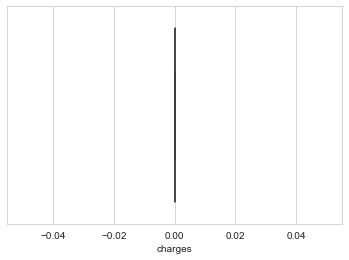

In [183]:
sns.boxplot(data['charges'])

In [184]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,0.0
1,18,male,33.770,1,no,southeast,0.0
2,28,male,33.000,3,no,southeast,0.0
3,33,male,22.705,0,no,northwest,0.0
4,32,male,28.880,0,no,northwest,0.0


In [181]:
print(data.shape)

(1338, 7)


<AxesSubplot:xlabel='bmi'>

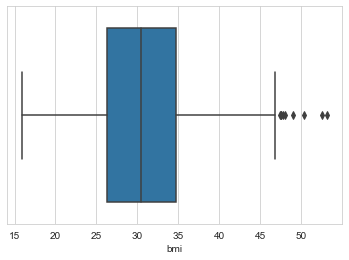

In [182]:
sns.boxplot(data.bmi)

In [161]:
data.nlargest(10, ['bmi'])

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,18.0
1047,22,male,52.58,1,yes,southeast,22.0
847,23,male,50.38,1,no,southeast,23.0
116,58,male,49.06,0,no,southeast,58.0
286,46,female,48.07,2,no,northeast,46.0
1088,52,male,47.74,1,no,southeast,52.0
860,37,female,47.60,2,yes,southwest,37.0
401,47,male,47.52,1,no,southeast,47.0
543,54,female,47.41,0,yes,southeast,NaN
438,52,female,46.75,5,no,southeast,52.0


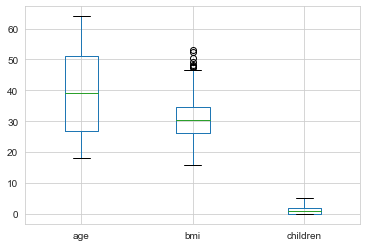

In [187]:
# Identified only bmi have outliers so i removed outliers

data['bmi']=np.log(data['bmi']<51)

<AxesSubplot:xlabel='bmi'>

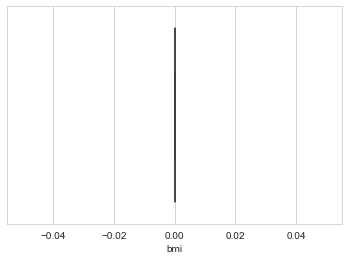

In [188]:
sns.boxplot(data.bmi)

In [165]:
data.bmi.count()

1336

In [166]:
data.describe()

,age,children
count,1338.000000,1338.000000
mean,39.207025,1.094918
std,14.049960,1.205493
min,18.000000,0.000000
25%,27.000000,0.000000
50%,39.000000,1.000000
75%,51.000000,2.000000
max,64.000000,5.000000


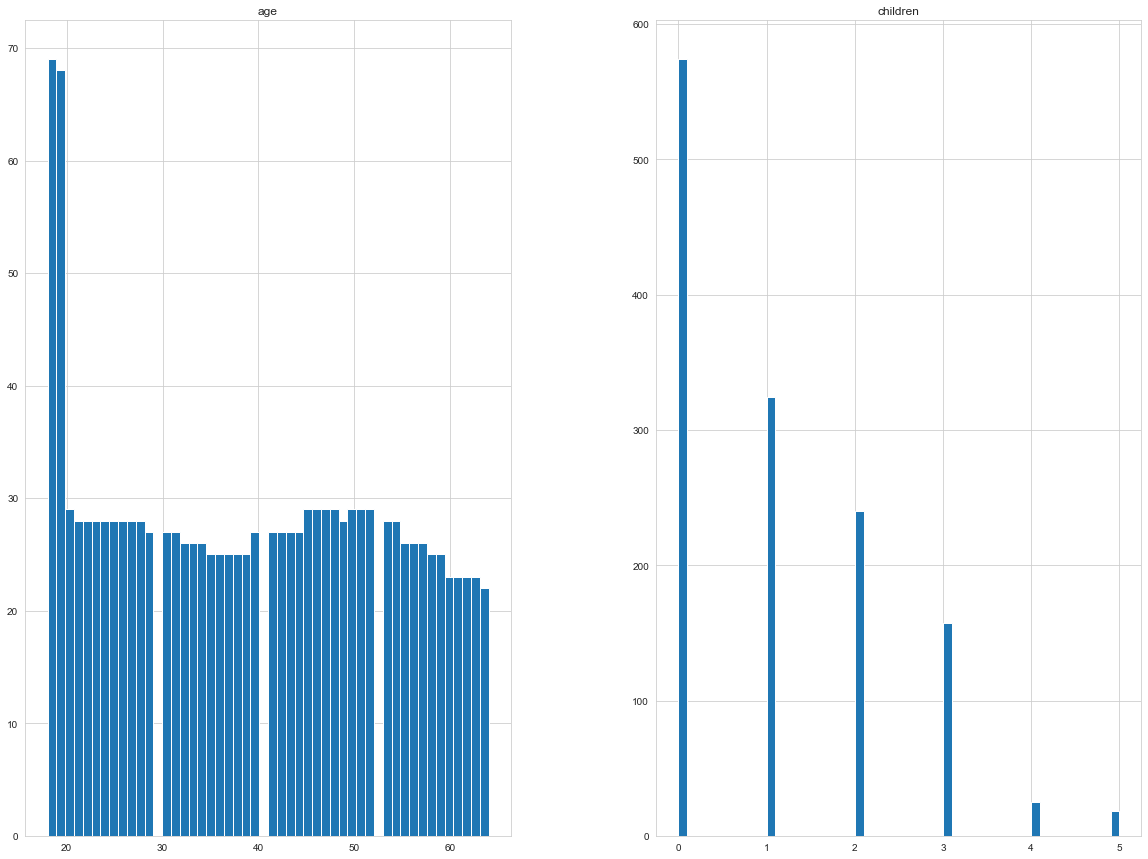

In [154]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
t.show()

# Plot for charges on a histogram. 

The distribution of sale prices is right skewed, something that is expected.
Here I perform my first bit of feature engineering. I’ll apply a log transform to charges to compress outliers making the distribution normal.

Outliers can have devastating effects on models that use loss functions minimising squared error. Instead of removing outliers try applying a transformation.

In [12]:
from scipy import stats
# transform training data & save lambda value
charges_log, fitted_lambda = stats.boxcox(data['charges'])
charges_log

array([12.12898079,  8.80859691, 10.14752207, ...,  8.72968418,
        9.01913209, 12.97366269])

Lambda value used for Transformation: 0.043649076181837054


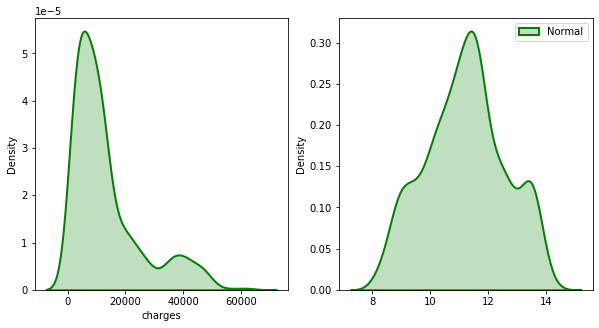

In [13]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data['charges'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(charges_log, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [14]:
data['charges_log']= np.log(data.charges)

<AxesSubplot:xlabel='Count', ylabel='charges'>

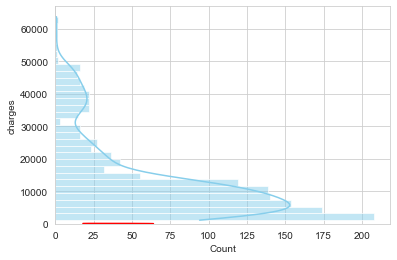

In [87]:
sns.histplot(data=data, y="charges", color="skyblue",  kde=True)
sns.histplot(data=data, x="age", color="red", kde=True)


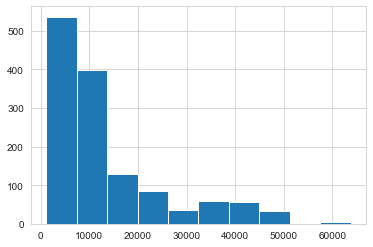

In [83]:
plt.hist(data.charges)
plt.show()

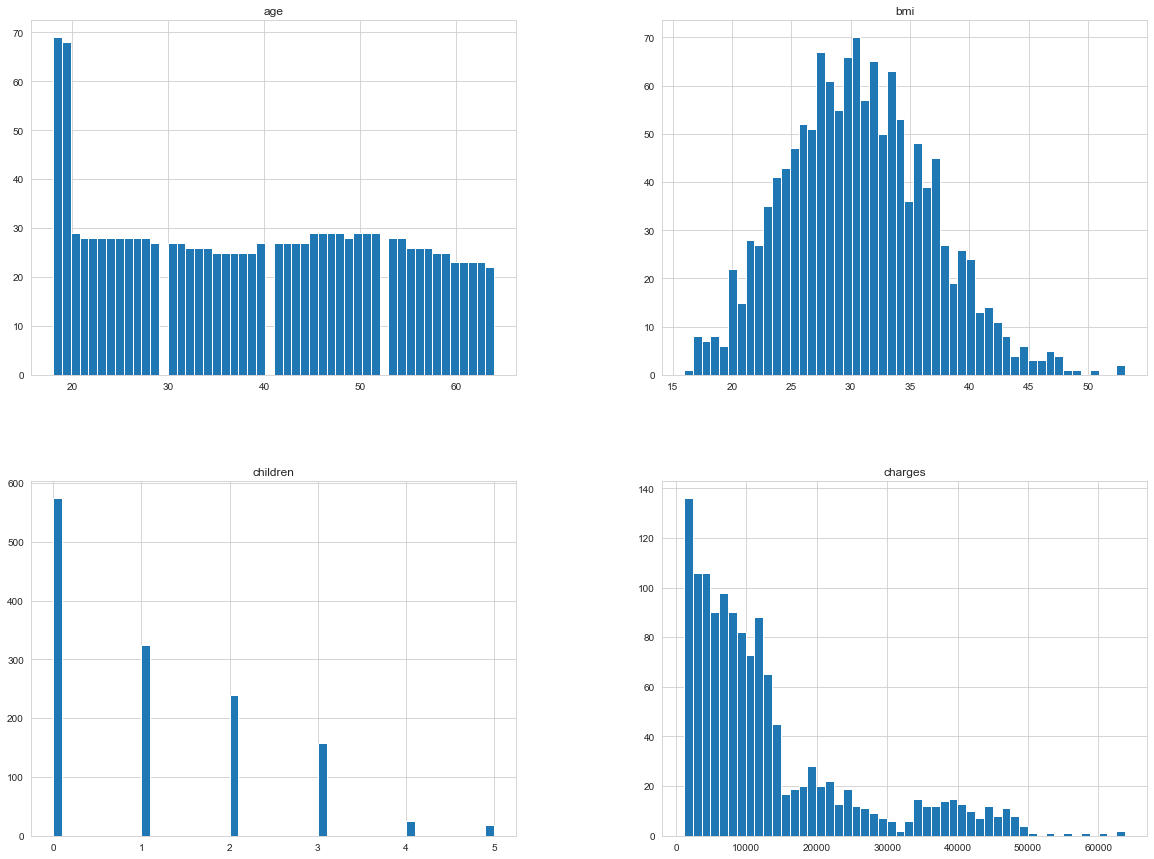

In [88]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

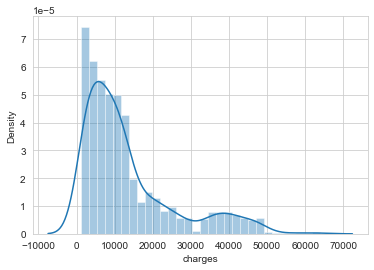

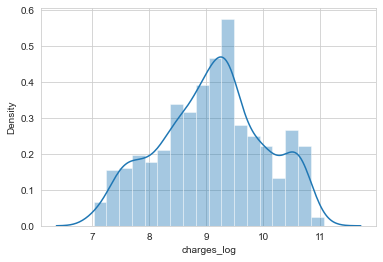

In [15]:
x = data.charges
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

data['charges_log'] = np.log(data.charges)
x = data.charges_log
sns.distplot(x)
plt.show()


In [16]:
data= data.drop(columns=['charges'])

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges_log
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


# Correlation of Data

<AxesSubplot:>

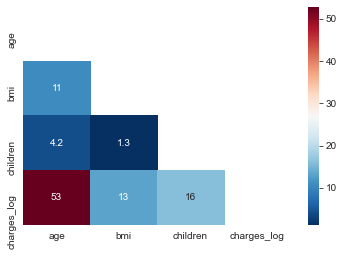

In [18]:
# mask out upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sns.heatmap(data.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [19]:
print(data.corr())

                  age       bmi  children  charges_log
age          1.000000  0.109272  0.042469     0.527834
bmi          0.109272  1.000000  0.012759     0.132669
children     0.042469  0.012759  1.000000     0.161336
charges_log  0.527834  0.132669  0.161336     1.000000


# We have some Categorical Data so apply One hot Encoding

In [20]:
data=pd.get_dummies(data)
data.head(2)

,age,bmi,children,charges_log,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.77,1,7.453302,0,1,1,0,0,0,1,0


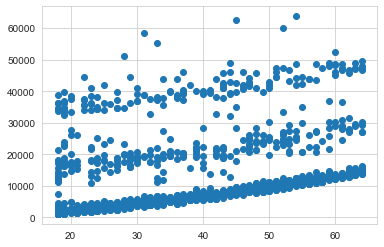

In [80]:
plt.scatter(data['age'], data['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')

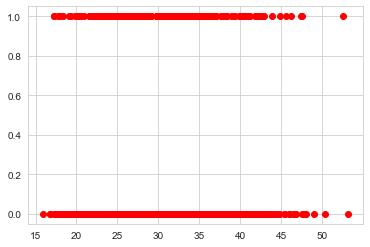

In [22]:
plt.scatter(data['bmi'], data['smoker_yes'], color='red')

# Superwised Machine Learning Models

# Build Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data Cross Validation by using Train test split Method
Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

In [24]:
# Split X and y

X = data.drop(['charges_log'], axis=1)
y = data[['charges_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [26]:
print("Train Data", X_train.shape)
print("Test Data", X_test.shape)

Train Data (936, 11)
Test Data (402, 11)


In [27]:
model= LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

Explore the Predicted Values in graphical format

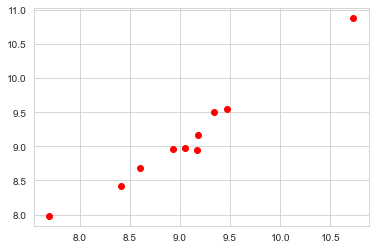

In [28]:
plt.scatter(y_test[0:10], y_pred[0:10], color='red')

In [29]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2_linear=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2_linear,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))



explained_variance:  0.7726
mean_squared_log_error:  0.002
r2:  0.7725
MAE:  0.2798
MSE:  0.2006
RMSE:  0.4478


# Linear Regression Model Accuracy

In [30]:
print('Linear Regression Model Accuracy is', r2_linear.round(2)*100, '%')

Linear Regression Model Accuracy is 77.0 %


# Build Ridge Regression Model

In [31]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train,y_train)
print(sqrt(mean_squared_error(y_train, ridgeReg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
r2_ridge=ridgeReg.score(X_test, y_test)
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

0.4412842303143742
0.4478136874495315
R2 Value/Coefficient of Determination: 0.7725298858092953


# Ridge Regression Model Accuracy

In [32]:
print('Ridge Regression Model Accuracy is', r2_ridge.round(2)*100, '%')

Ridge Regression Model Accuracy is 77.0 %


# Build Lasso Regression Model

In [33]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train,y_train)
r2_lasso=lassoreg.score(X_test, y_test)

print(sqrt(mean_squared_error(y_train, lassoreg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

0.44839238098661743
0.45453134860358596
R2 Value/Coefficient of Determination: 0.7656541315645757


# Lasso Regression Model Accuracy

In [34]:
print('Lasso Regression Model Accuracy is', r2_lasso.round(2)*100, '%')

Lasso Regression Model Accuracy is 77.0 %


# Build Elastic Net Regression Model

In [35]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(X_train, y_train)
r2_Elastic=Elas.score(X_test, y_test)
print(sqrt(mean_squared_error(y_train, Elas.predict(X_train))))
print(sqrt(mean_squared_error(y_test, Elas.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(X_test, y_test)))

0.495963203478928
0.4988882844182607
R2 Value/Coefficient of Determination: 0.7176835209715573


# Elastic Net Regression Model Accuracy

In [36]:
print('Elastic Net Regression Model Accuracy is', r2_Elastic.round(2)*100, '%')

Elastic Net Regression Model Accuracy is 72.0 %


# Build XGB Regressor

# The benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolut

In [38]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [39]:
# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

[12:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [40]:
# trained XGBoost model automatically calculates feature importance on our predictive modeling problem.

# These importance scores are available in the feature_importances_ member variable of the trained model.

# Model importance 
Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [41]:
print(xgb_reg.feature_importances_)

[0.25473997 0.01346319 0.02865839 0.01029253 0.         0.6662077
 0.         0.02195938 0.00175523 0.         0.00292374]


In [42]:
R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2)*100, '%')


RMSE:  0.38

R-Squared:  84.0 %


# XGB Regressor Model Accuracy

In [43]:
print('XGB Regression Model Accuracy is', R_squared.round(2)*100, '%')

XGB Regression Model Accuracy is 84.0 %


# Decision Tree Model

In [44]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
# predicting value
predictions = regressor.predict(X_test)

In [46]:
r2_deci = r2_score(y_test, predictions)

In [47]:
r2_deci

0.6809362697367225

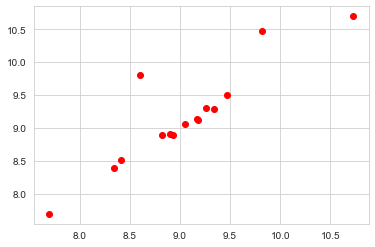

In [48]:
plt.scatter(y_test[0:15], predictions[0:15], color='red')

# Decision Tree Model Accuracy

In [49]:
print('Decision Tree Regression Model Accuracy is', r2_deci.round(2)*100, '%')

Decision Tree Regression Model Accuracy is 68.0 %


# Random Forest Model

In [50]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [51]:
Predictionsrandomforest = regressor.predict(X_test) # test the output by changing values

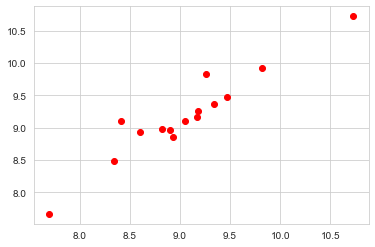

In [52]:
plt.scatter(y_test[0:15], Predictionsrandomforest[0:15], color='red')

In [53]:
r2 = r2_score(y_test,Predictionsrandomforest)
r2

0.8103091729430505

In [54]:
print('Random Forest Regression Model Accuracy is ', r2.round(2)*100, '%')

Random Forest Regression Model Accuracy is  81.0 %


# Conclusion

By Comparing the all Models XGB Regressor is the best fith 84% Accuracy